In [1]:
import mdtraj as md
import glob
import nglview
from rdkit.Chem import AllChem, rdFMCS
from rdkit import Chem

import seaborn as sns
import matplotlib.pyplot as plt
from simtk import unit
import numpy as np

plt.style.use('seaborn')


In [2]:
mol = Chem.MolFromMolFile('tyk2/lig0.mol', removeHs=False, sanitize=False)
AllChem.Compute2DCoords(mol)


0

In [3]:
# draw mol -- include bonds and set atom indices

from rdkit.Chem.Draw import rdMolDraw2D
d = rdMolDraw2D.MolDraw2DSVG(950, 900) # or MolDraw2DSVG to get SVGs


bonds_to_mark = {#'1': [(3,7),(7,9),(9,10)],
                '2': [(14,16), (16,17), (17,19)],
                 #'3' : [(13,14), (14,16), (16,17)],
                 '4' : [(10,9), (9,7), (7,3)]
                 }

highlight_atoms = []
highlight_bonds = []
list_of_colos = [(0.8,0.0,0.8), (0.8,0.8,0.0)]#, (0.0,0.8,0.8), (0.0,0.0,0.8)]
bond_cols = {}
atoms_cols = {}

mol.GetAtomWithIdx(13).SetProp('atomNote', str(13))
mol.GetAtomWithIdx(11).SetProp('atomNote', str(11))


for bonds, cols in zip(bonds_to_mark.values(), list_of_colos):
    print(bonds)
    print(cols)
    for a,b in bonds:
        idx= mol.GetBondBetweenAtoms(a,b).GetIdx()
        highlight_bonds.append(idx)
        bond_cols[idx] = cols
        atoms_cols[a] = cols
        highlight_atoms.append(a)
        highlight_atoms.append(b)
        atoms_cols[b] = cols
        mol.GetAtomWithIdx(a).SetProp('atomNote', str(a))
        mol.GetAtomWithIdx(b).SetProp('atomNote', str(b))
print(highlight_bonds)
print(highlight_atoms)
print(bond_cols)
print(atoms_cols)
d.drawOptions().annotationFontScale = 1.0
#d.drawOptions().addAtomIndices = True

rdMolDraw2D.PrepareAndDrawMolecule(d, mol, 
                                   highlightBonds=highlight_bonds, 
                                   highlightBondColors=bond_cols,
                                   highlightAtoms=list(set(highlight_atoms)),
                                   highlightAtomColors=atoms_cols
                                  )#highlightAtoms=highlight_atoms,
                                    #highlightAtomColors=atom_cols,
                                   #highlightBonds=hit_bonds,
                                   #highlightBondColors=bond_cols)


d.FinishDrawing()
with open('atom_annotation_1.svg', 'w') as f:   
    f.write(d.GetDrawingText())


[(14, 16), (16, 17), (17, 19)]
(0.8, 0.0, 0.8)
[(10, 9), (9, 7), (7, 3)]
(0.8, 0.8, 0.0)
[23, 24, 26, 14, 12, 10]
[14, 16, 16, 17, 17, 19, 10, 9, 9, 7, 7, 3]
{23: (0.8, 0.0, 0.8), 24: (0.8, 0.0, 0.8), 26: (0.8, 0.0, 0.8), 14: (0.8, 0.8, 0.0), 12: (0.8, 0.8, 0.0), 10: (0.8, 0.8, 0.0)}
{14: (0.8, 0.0, 0.8), 16: (0.8, 0.0, 0.8), 17: (0.8, 0.0, 0.8), 19: (0.8, 0.0, 0.8), 10: (0.8, 0.8, 0.0), 9: (0.8, 0.8, 0.0), 7: (0.8, 0.8, 0.0), 3: (0.8, 0.8, 0.0)}


In [4]:
# load all trajs and weights

traj_solvent_qml = md.load(f"./tyk2/forward_lig0.solvent.pdb")
solvent_qml_weights = np.load(f"./tyk2/solvent.lig0.normalized_weights.npz", allow_pickle=True)['weights']

traj_complex_qml = md.load(f"./tyk2/lig0.complex.forward.MOL.pdb")
complex_qml_weights = np.load(f"./tyk2/complex.lig0.normalized_weights.npz", allow_pickle=True)['weights']

traj_solvent_mm = md.load(f"./tyk2/og_lig0_solvent.pdb")
traj_complex_mm = md.load(f"./tyk2/lig0.complex.MOL.pdb")

In [5]:
#plt.figure(figsize=[2, 2], dpi=300)

#dihedrals_mm = (md.compute_dihedrals(traj_solvent_mm, [[3,7,9,10]]))
#dihedrals_qml = (md.compute_dihedrals(traj_solvent_qml, [[3,7,9,10]]))
#sns.distplot(dihedrals_mm, bins=50, label='MM', )
#sns.distplot(dihedrals_qml, bins=50, label='ML/MM', hist_kws={'weights': qml_weights})
#plt.legend(prop={'size': 10})
#plt.xlim(-np.pi, np.pi)
#plt.xlabel('$\phi$(C10,N9,C7,C3) [rad]', fontsize=10)
#plt.show()

In [6]:
#plt.figure(figsize=[2, 2], dpi=300)
#dihedrals_mm = (md.compute_dihedrals(traj_solvent_mm, [[14,16,17,19]]))
#dihedrals_qml = (md.compute_dihedrals(traj_solvent_qml, [[14,16,17,19]]))
#sns.distplot(dihedrals_mm, bins=50, label='MM', )
#sns.distplot(dihedrals_qml, bins=50, label='ML/MM', hist_kws={'weights': qml_weights})
#plt.legend(prop={'size': 10})
#plt.xlim(-np.pi, np.pi)
#plt.xlabel('$\phi$(C:14,N:16,C:17,C:19) [rad]', fontsize=10)
#plt.show()

In [7]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(value / np.pi))
    if N == 0:
        return "0"
    elif N == -1:
        return r"$-\pi$"
    elif N == 1:
        return r"$\pi$"
    else:
        pass


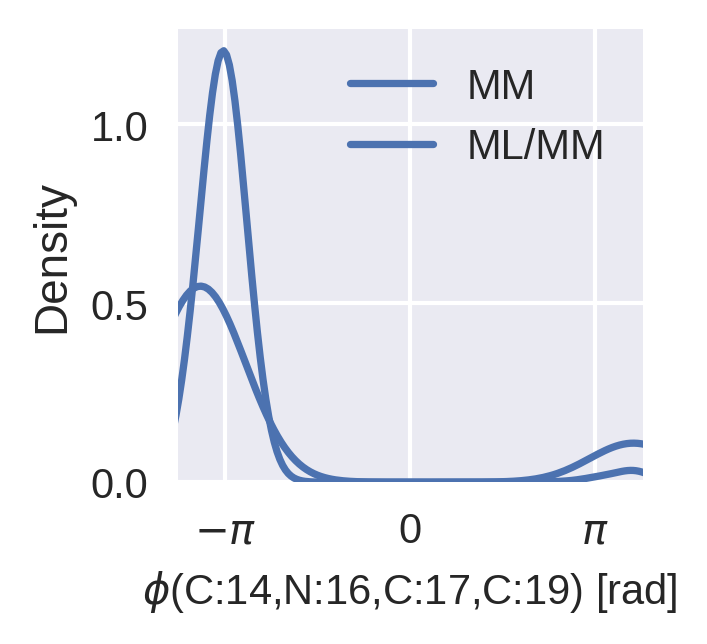

In [8]:
# test: plot kde for complex mm and qml

f,ax=plt.subplots(figsize=[2, 2], dpi=300)

dihedrals_mm = (md.compute_dihedrals(traj_complex_mm, [[13,14,16,17]]))
dihedrals_qml = (md.compute_dihedrals(traj_complex_qml, [[13,14,16,17]]))
sns.kdeplot(data=dihedrals_mm, label='MM')
sns.kdeplot(data=dihedrals_qml, label='ML/MM', weights = solvent_qml_weights)
plt.legend(prop={'size': 10})
plt.xlim(-np.pi, np.pi)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

plt.xlabel('$\phi$(C:14,N:16,C:17,C:19) [rad]', fontsize=10)
plt.show()
plt.close()

##############
solvent
##############


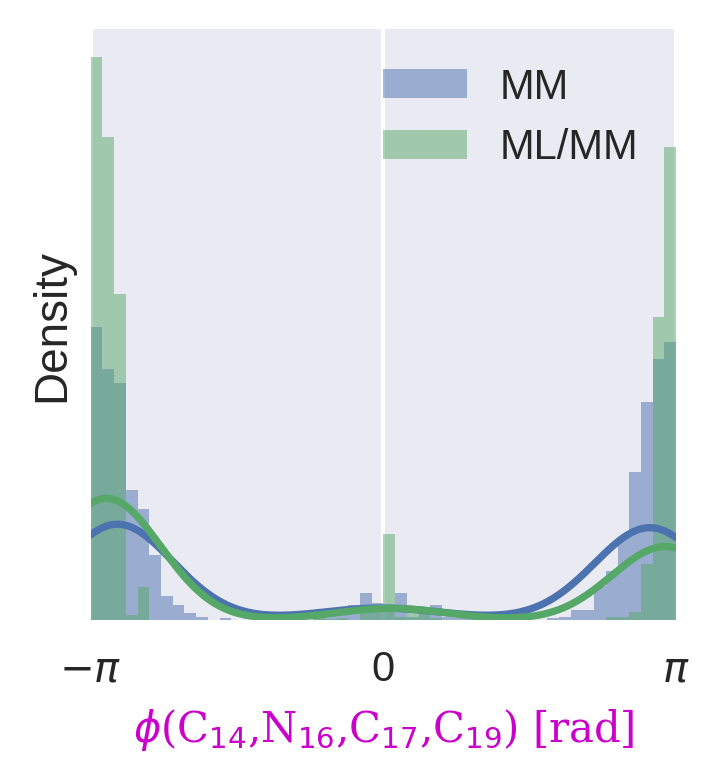

##############
complex
##############


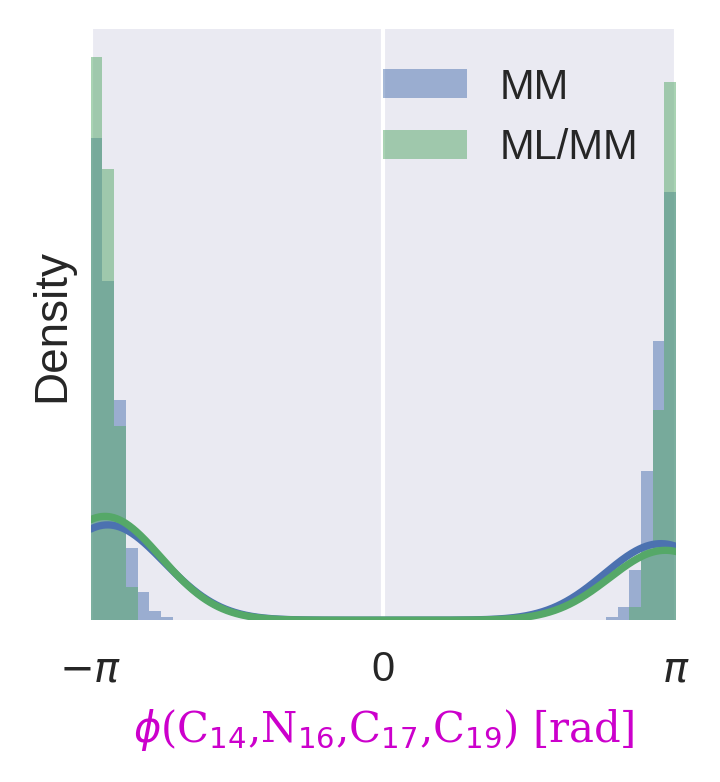

In [92]:
# plot hist and kde for 14,16,17,19 in solution/complex
from scipy import stats

for name, traj_mm, traj_qml, weights in [('solvent', traj_solvent_mm, traj_solvent_qml, solvent_qml_weights), ('complex', traj_complex_mm, traj_complex_qml, complex_qml_weights)]:

    print('##############')
    print(name)
    print('##############')
    font = {'family': 'serif',
            'color':  '#cc00ccff',
            'weight': 'normal',
            'size': 16,
            }

    f,ax=plt.subplots(figsize=[2.5, 2.5], dpi=300)
    dihedrals_mm = (md.compute_dihedrals(traj_mm, [[14,16,17,19]])).flat
    dihedrals_qml = (md.compute_dihedrals(traj_qml, [[14,16,17,19]])).flat
    
    #dihedrals_mm = list(np.array(dihedrals_mm) - np.pi) + list(np.array(dihedrals_mm)) + list(np.array(dihedrals_mm) + np.pi) 
    #dihedrals_qml = list(np.array(dihedrals_qml) - np.pi) + list(np.array(dihedrals_qml)) + list(np.array(dihedrals_qml) + np.pi) 
    #coc_weights = list(weights) + list(weights) + list(weights)
    

    color=next(ax._get_lines.prop_cycler)['color']
    plt.hist(dihedrals_mm, density=True, bins=50, label='MM', alpha=0.5, color=color)
    kde = stats.gaussian_kde(dihedrals_mm, bw_method=0.2)
    xx = np.linspace(-np.pi, np.pi, 1000)
    plt.plot(xx, kde(xx), c=color)

    color=next(ax._get_lines.prop_cycler)['color']
    plt.hist(dihedrals_qml, density=True, weights=weights, bins=50, label='ML/MM', alpha=0.5, color=color)
    kde = stats.gaussian_kde(dihedrals_qml, weights=weights , bw_method=0.2)
    xx = np.linspace(-np.pi, np.pi, 1000)
    plt.plot(xx, kde(xx), c=color)

    #sns.distplot(dihedrals_mm, bins=30, label='MM', norm_hist=True)
    #sns.distplot(dihedrals_qml, bins=30, label='ML/MM', hist_kws={'weights': weights}, kde_kws={'weights': weights},norm_hist=True)
    plt.legend(prop={'size': 10})
    plt.xlim(-np.pi, np.pi)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    ticks_ = np.multiply([-1.0, 0, 1.0], np.pi)
    ax.set(xticks=ticks_)
    plt.ylabel('Density')
    ax.axes.get_yaxis().set_ticks([])
    plt.tight_layout()
    #plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel('$\phi$(C$_{14}$,N$_{16}$,C$_{17}$,C$_{19}$) [rad]', fontsize=10, fontdict=font)
    plt.show()
    plt.close()

##############
solvent
##############


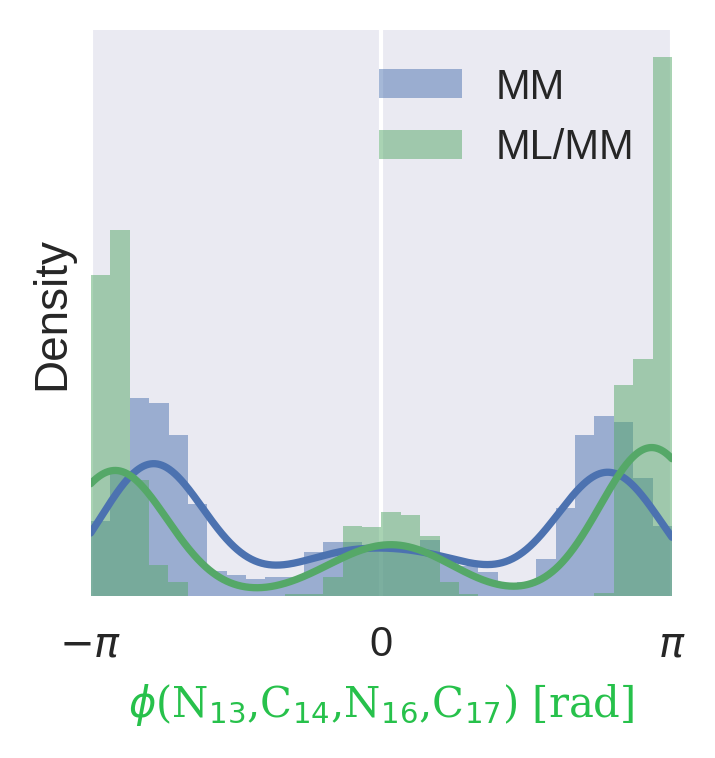

##############
complex
##############


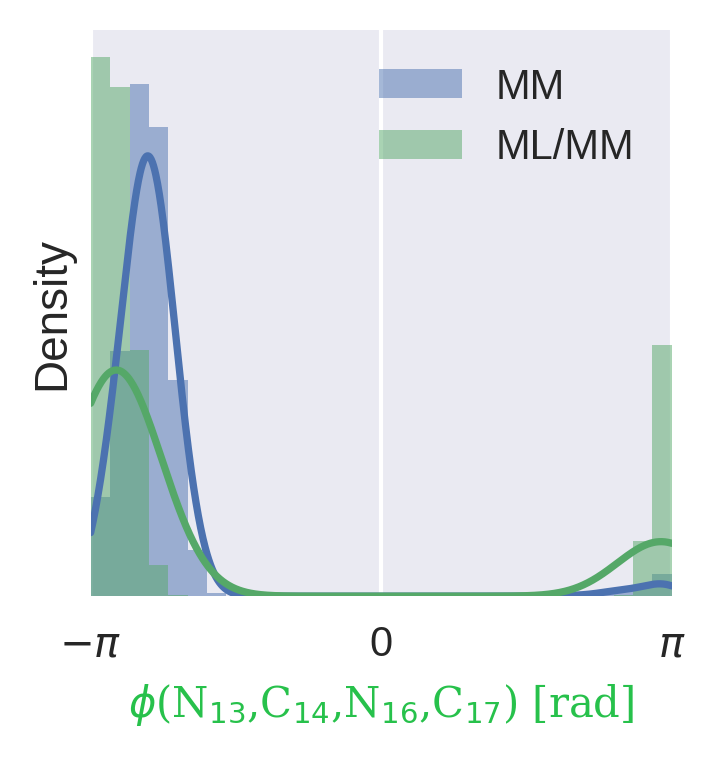

In [91]:
# plot hist and kde for 13,14,16,17 in solvent/complex

font = {'family': 'serif',
        'color':  '#27c14bff',
        'weight': 'normal',
        'size': 16,
        }

for name, traj_mm, traj_qml, weights in [('solvent', traj_solvent_mm, traj_solvent_qml, solvent_qml_weights), ('complex', traj_complex_mm, traj_complex_qml, complex_qml_weights)]:

    print('##############')
    print(name)
    print('##############')

    f,ax=plt.subplots(figsize=[2.5, 2.5], dpi=300)
    dihedrals_mm = (md.compute_dihedrals(traj_mm, [[13,14,16,17]])).flat
    dihedrals_qml = (md.compute_dihedrals(traj_qml, [[13,14,16,17]])).flat
    color=next(ax._get_lines.prop_cycler)['color']
    plt.hist(dihedrals_mm, density=True, bins=30, label='MM', alpha=0.5, color=color)
    kde = stats.gaussian_kde(dihedrals_mm, bw_method=0.2)
    xx = np.linspace(-np.pi, np.pi, 1000)
    plt.plot(xx, kde(xx), c=color)

    color=next(ax._get_lines.prop_cycler)['color']
    plt.hist(dihedrals_qml, density=True, weights=weights, bins=30, label='ML/MM', alpha=0.5, color=color)
    kde = stats.gaussian_kde(dihedrals_qml, weights=weights , bw_method=0.2)
    xx = np.linspace(-np.pi, np.pi, 1000)
    plt.plot(xx, kde(xx), c=color)
    plt.legend(prop={'size': 10})
    plt.xlim(-np.pi, np.pi)
    plt.ylabel('Density')
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    ticks_ = np.multiply([-1.0, 0, 1.0], np.pi)
    ax.set(xticks=ticks_)
    ax.axes.get_yaxis().set_ticks([])
    plt.xlabel('$\phi$(N$_{13}$,C$_{14}$,N$_{16}$,C$_{17}$) [rad]', fontsize=10, fontdict=font)
    plt.show()

##############
solvent
##############


/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning
/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning


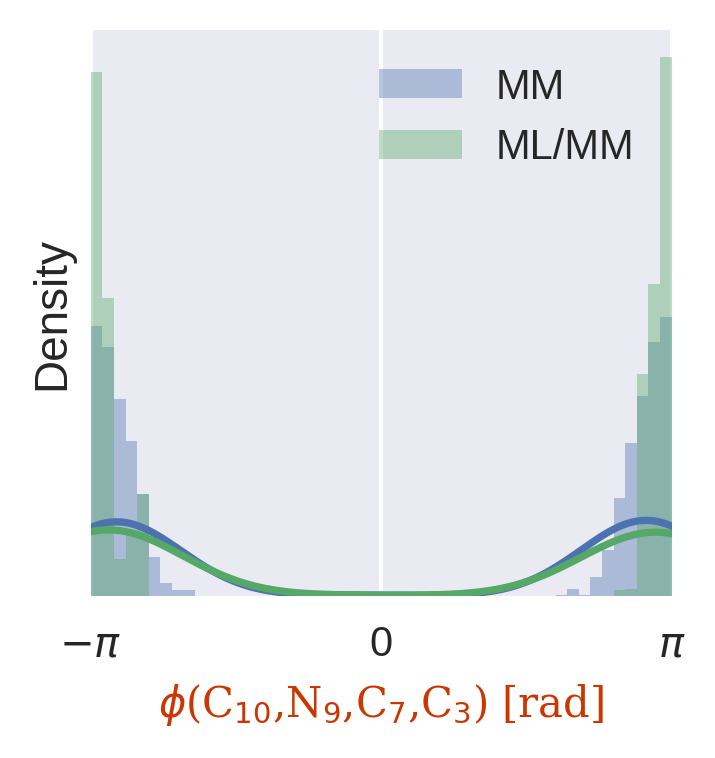

##############
complex
##############


/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning
/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning


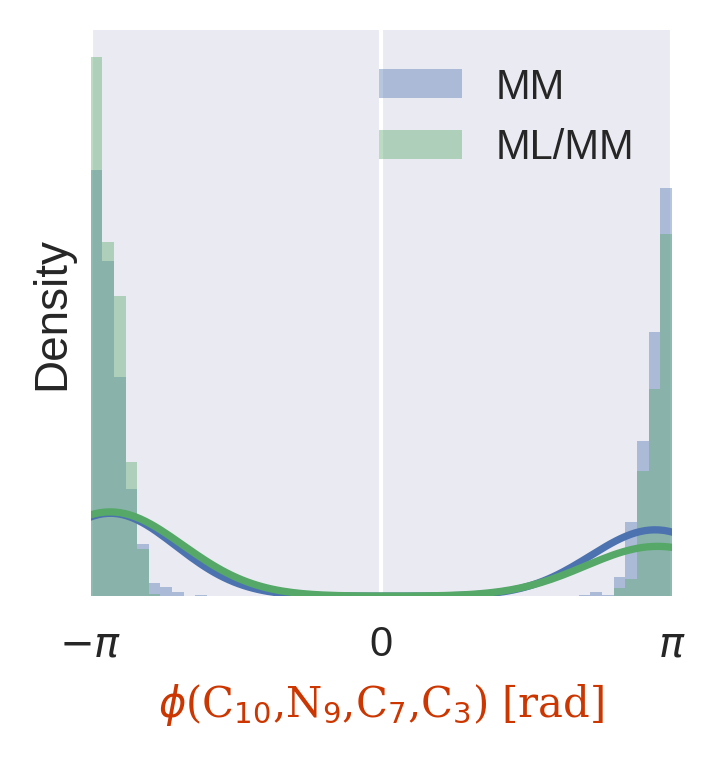

In [11]:
# plot hist and kde for 10,9,7,3 in solvent/complex

font = {'family': 'serif',
        'color':  '#cc3600ff',
        'weight': 'normal',
        'size': 16,
        }

for name, traj_mm, traj_qml, weights in [('solvent', traj_solvent_mm, traj_solvent_qml, solvent_qml_weights), ('complex', traj_complex_mm, traj_complex_qml, complex_qml_weights)]:

    print('##############')
    print(name)
    print('##############')

    f,ax=plt.subplots(figsize=[2.5, 2.5], dpi=300)
    dihedrals_mm = (md.compute_dihedrals(traj_mm, [[10,9,7,3]]))
    dihedrals_qml = (md.compute_dihedrals(traj_qml, [[10,9,7,3]]))
    sns.distplot(dihedrals_mm, bins=50, label='MM', norm_hist=True)
    sns.distplot(dihedrals_qml, bins=50, label='ML/MM', hist_kws={'weights': weights}, norm_hist=True)
    plt.legend(prop={'size': 10})
    plt.xlim(-np.pi, np.pi)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    ticks_ = np.multiply([-1.0, 0, 1.0], np.pi)
    ax.set(xticks=ticks_)
    ax.axes.get_yaxis().set_ticks([])
    plt.xlabel('$\phi$(C$_{10}$,N$_{9}$,C$_{7}$,C$_{3}$) [rad]', fontsize=10, fontdict=font)
    plt.show()

##############
solvent
##############


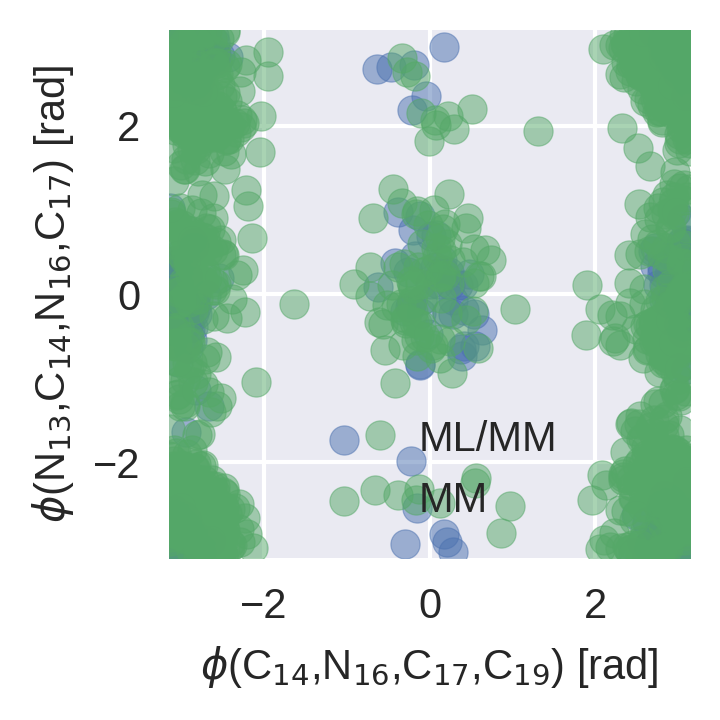

##############
complex
##############


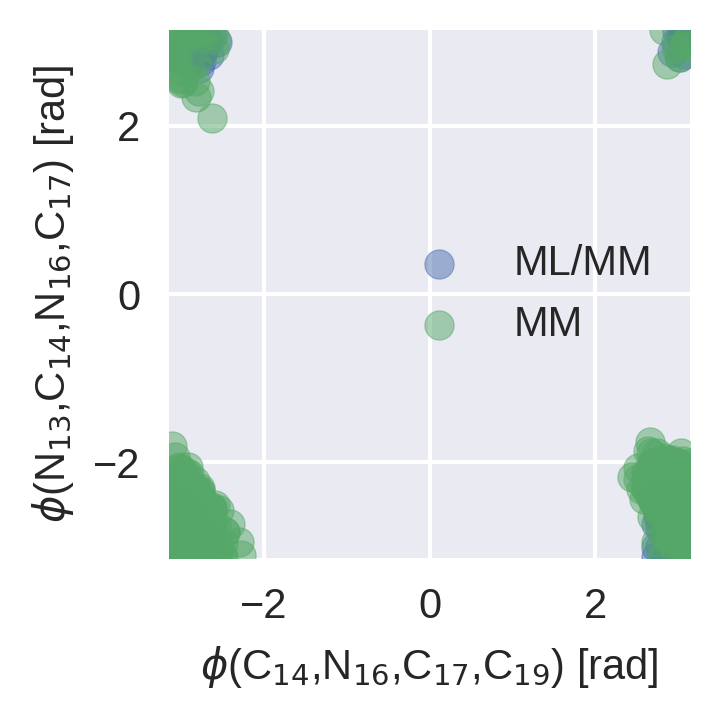

In [12]:
# plot scatter plot for 14,16,17,19 vs 13,14,16,17 in complex

for name, traj_mm, traj_qml, weights in [('solvent', traj_solvent_mm, traj_solvent_qml, solvent_qml_weights), ('complex', traj_complex_mm, traj_complex_qml, complex_qml_weights)]:

    print('##############')
    print(name)
    print('##############')

    f,ax=plt.subplots(figsize=[2.5, 2.5], dpi=300)

    dihedrals_mm_1 = md.compute_dihedrals(traj_mm, [[14,16,17,19 ]])
    dihedrals_qml_1 = md.compute_dihedrals(traj_qml, [[14,16,17,19 ]])

    dihedrals_mm_2 = md.compute_dihedrals(traj_mm, [[13,14,16,17]])
    dihedrals_qml_2 = md.compute_dihedrals(traj_qml, [[13,14,16,17]])

    plt.scatter(dihedrals_qml_1, dihedrals_qml_2, label='ML/MM', alpha=0.5)
    plt.scatter(dihedrals_mm_1, dihedrals_mm_2, label='MM', alpha=0.5)

    plt.xlabel(r'$\Phi$ Angle [radians]')
    plt.xlim(-np.pi, np.pi)
    plt.ylabel(r'$\Psi$ Angle [radians]')
    plt.ylim(-np.pi, np.pi)

    plt.ylabel(r'$\Psi$ Angle [radians]')
    plt.ylim(-np.pi, np.pi)
    plt.xlabel('$\phi$(C$_{14}$,N$_{16}$,C$_{17}$,C$_{19}$) [rad]', fontsize=10)
    plt.ylabel('$\phi$(N$_{13}$,C$_{14}$,N$_{16}$,C$_{17}$) [rad]', fontsize=10)
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.close()


##############
solvent
##############
##############
MM
##############
1407
1407
700


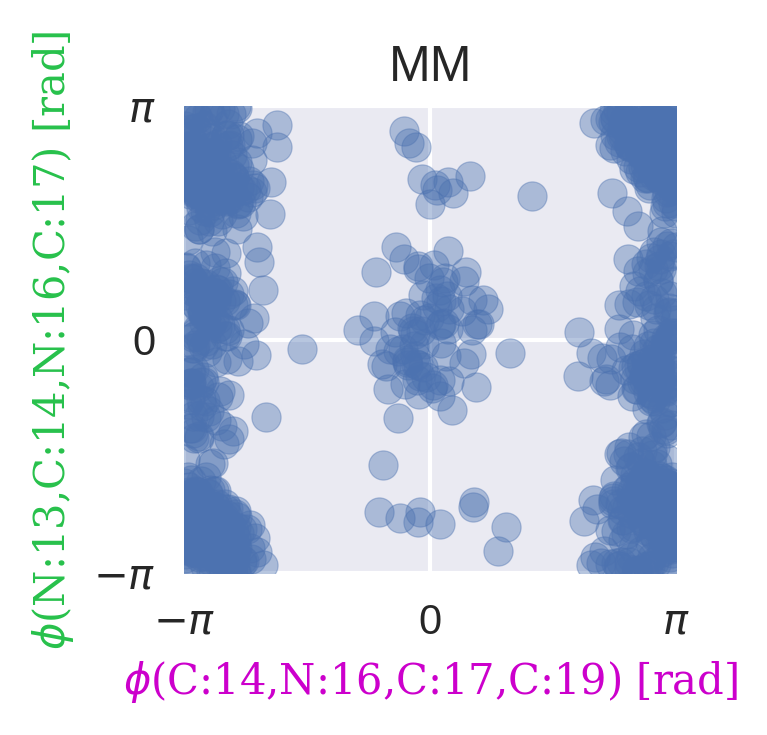

##############
ML/MM
##############
700
700
700


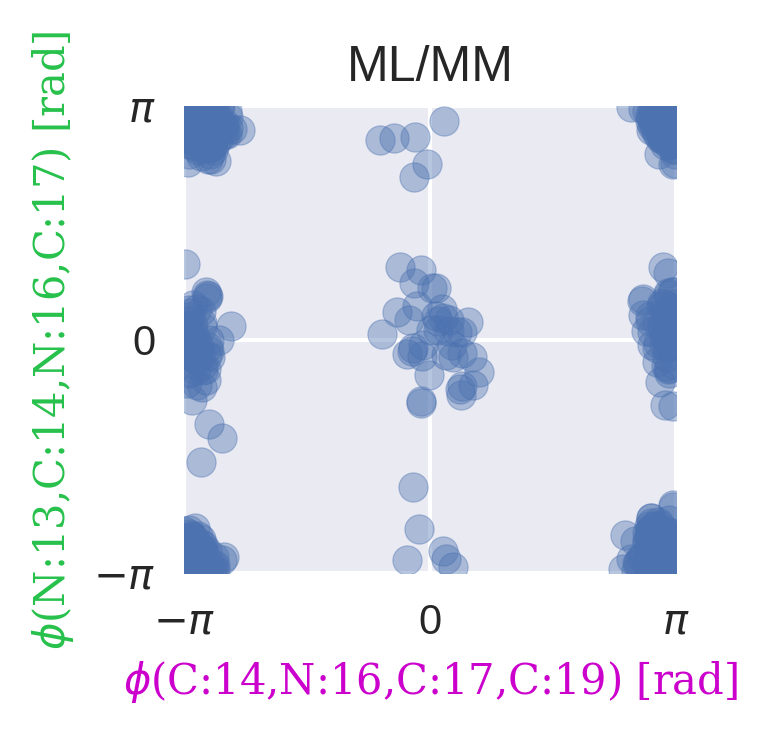

##############
complex
##############
##############
MM
##############
1407
1407
697


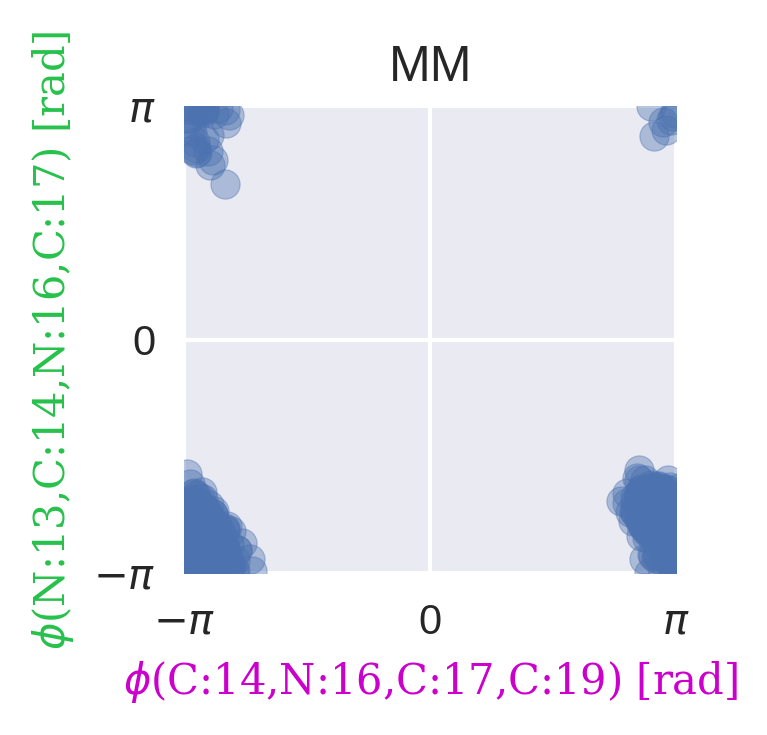

##############
ML/MM
##############
697
697
697


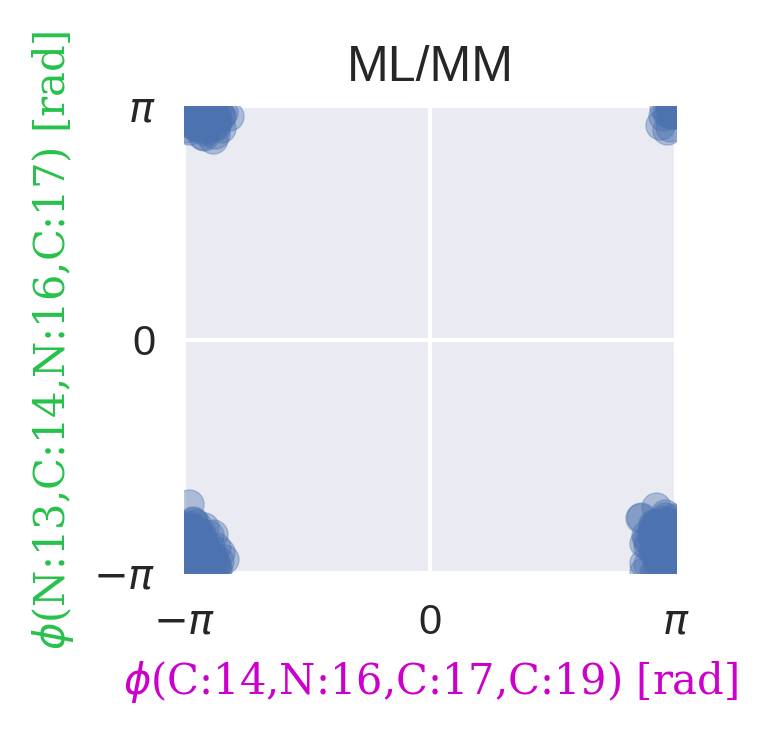

In [16]:
# plot shadowed contour plot for 14,16,17,19 vs 13,14,16,17 in solvent/complex for ML/MM



font1 = {'family': 'serif',
        'color':  '#cc00ccff',
        'weight': 'normal',
        'size': 16,
        }


font2 = {'family': 'serif',
        'color':  '#27c14bff',
        'weight': 'normal',
        'size': 16,
        }

for name, traj_mm, traj_qml, weights in [('solvent', traj_solvent_mm, traj_solvent_qml, solvent_qml_weights), ('complex', traj_complex_mm, traj_complex_qml, complex_qml_weights)]:

    print('##############')
    print(name)
    print('##############')


    dihedrals_mm_1 = list(md.compute_dihedrals(traj_mm, [[14,16,17,19]]).flat)
    dihedrals_qml_1 = list(md.compute_dihedrals(traj_qml, [[14,16,17,19]]).flat)

    dihedrals_mm_2 = list(md.compute_dihedrals(traj_mm, [[13,14,16,17]]).flat)
    dihedrals_qml_2 = list(md.compute_dihedrals(traj_qml, [[13,14,16,17]]).flat)


    for level_of_theory, dihedrals_1, dihedrals_2 in [('MM', dihedrals_mm_1, dihedrals_mm_2), ('ML/MM', dihedrals_qml_1, dihedrals_qml_2)]:
        
        print('##############')
        print(level_of_theory)
        print('##############')

        print(len(dihedrals_1))
        print(len(dihedrals_2))
        print(len(weights))
        f,ax=plt.subplots(figsize=[2.5, 2.5], dpi=300)
        plt.scatter(dihedrals_1, dihedrals_2, alpha=0.4, label=level_of_theory, cmap='Reds')
        plt.xlabel(r'$\Phi$ Angle [radians]')
        plt.xlim(-np.pi, np.pi)
        plt.title(level_of_theory)
        plt.xlim(-np.pi, np.pi)
        ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
        ticks_ = np.multiply([-1.0, 0, 1.0], np.pi)
        ax.set(xticks=ticks_)
        ax.set(yticks=ticks_)


        plt.ylabel(r'$\Psi$ Angle [radians]')
        plt.ylim(-np.pi, np.pi)
        plt.xlabel('$\phi$(C:14,N:16,C:17,C:19) [rad]', fontsize=10, fontdict=font1)
        plt.ylabel('$\phi$(N:13,C:14,N:16,C:17) [rad]', fontsize=10, fontdict=font2)
        plt.tight_layout()
        plt.show()
        plt.close()


##############
solvent
##############
##############
MM
##############
1407
1407
700


/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning
/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/distributions.py:1587: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


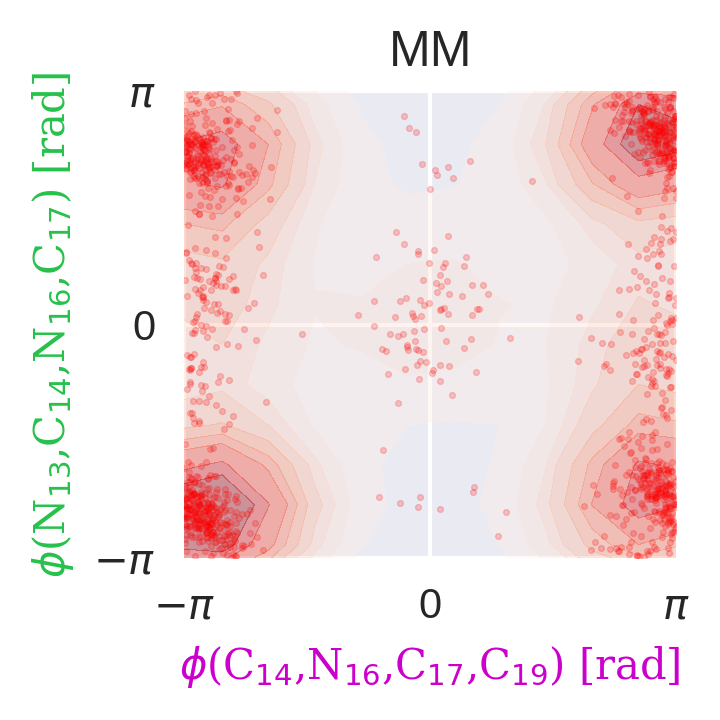

##############
ML/MM
##############
700
700
700


/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning
/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/distributions.py:1587: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


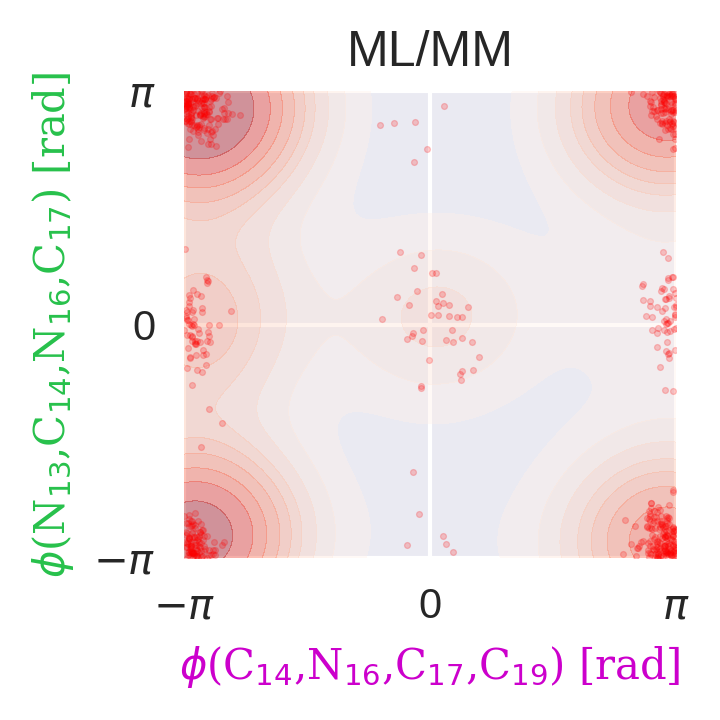

##############
complex
##############
##############
MM
##############
1407
1407
697


/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning
/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/distributions.py:1587: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


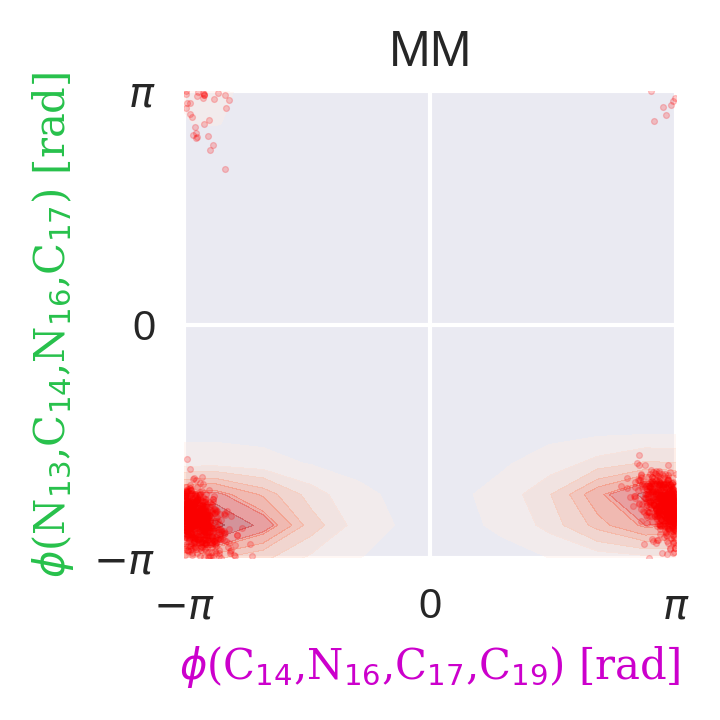

##############
ML/MM
##############
697
697
697


/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explcit keyword will result in an error or misinterpretation.
  FutureWarning
/home/mwieder/anaconda3/envs/nn-endstate/lib/python3.7/site-packages/seaborn/distributions.py:1587: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


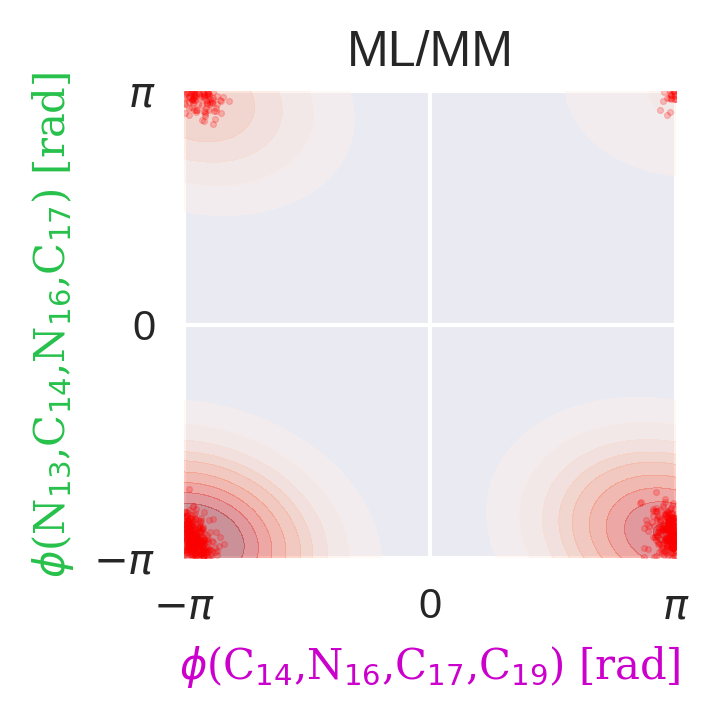

In [99]:
# plot shadowed contour plot for 14,16,17,19 vs 13,14,16,17 in solvent/complex for ML/MM



font1 = {'family': 'serif',
        'color':  '#cc00ccff',
        'weight': 'normal',
        'size': 16,
        }


font2 = {'family': 'serif',
        'color':  '#27c14bff',
        'weight': 'normal',
        'size': 16,
        }

for name, traj_mm, traj_qml, weights in [('solvent', traj_solvent_mm, traj_solvent_qml, solvent_qml_weights), ('complex', traj_complex_mm, traj_complex_qml, complex_qml_weights)]:

    print('##############')
    print(name)
    print('##############')


    dihedrals_mm_1 = list(md.compute_dihedrals(traj_mm, [[14,16,17,19]]).flat)
    dihedrals_qml_1 = list(md.compute_dihedrals(traj_qml, [[14,16,17,19]]).flat)

    dihedrals_mm_2 = list(md.compute_dihedrals(traj_mm, [[13,14,16,17]]).flat)
    dihedrals_qml_2 = list(md.compute_dihedrals(traj_qml, [[13,14,16,17]]).flat)


    for level_of_theory, dihedrals_1, dihedrals_2 in [('MM', dihedrals_mm_1, dihedrals_mm_2), ('ML/MM', dihedrals_qml_1, dihedrals_qml_2)]:
        
        print('##############')
        print(level_of_theory)
        print('##############')

        print(len(dihedrals_1))
        print(len(dihedrals_2))
        print(len(weights))
        f,ax=plt.subplots(figsize=[2.5, 2.5], dpi=300)
        #plt.scatter(dihedrals_1, dihedrals_2, alpha=0.4, label=level_of_theory, cmap='Reds')

        if level_of_theory == 'MM':
            sns.kdeplot(dihedrals_1, dihedrals_2, alpha=0.4, bw=0.3, gridsize=20, label=level_of_theory, shade=True, cmap='Reds',)
            plt.scatter(dihedrals_1, dihedrals_2, alpha=0.2, label=level_of_theory, c='r', s=2)

        else:
            sns.kdeplot(dihedrals_1, dihedrals_2, weights=weights, bw=0.3, shade=True, cmap='Reds', alpha=0.4, label=level_of_theory)
            plt.scatter(dihedrals_1, dihedrals_2, alpha=0.2, label=level_of_theory, c='r', s=2)

        plt.xlabel(r'$\Phi$ Angle [radians]')
        plt.xlim(-np.pi, np.pi)
        plt.title(level_of_theory)
        plt.xlim(-np.pi, np.pi)
        ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
        ticks_ = np.multiply([-1.0, 0, 1.0], np.pi)
        ax.set(xticks=ticks_)
        ax.set(yticks=ticks_)


        plt.ylabel(r'$\Psi$ Angle [radians]')
        plt.ylim(-np.pi, np.pi)
        plt.xlabel('$\phi$(C$_{14}$,N$_{16}$,C$_{17}$,C$_{19}$) [rad]', fontsize=10, fontdict=font1)
        plt.ylabel('$\phi$(N$_{13}$,C$_{14}$,N$_{16}$,C$_{17}$) [rad]', fontsize=10, fontdict=font2)
        plt.tight_layout()
        plt.show()
        plt.close()
